# <span style="color:#20B2AA">Table of Contents</span>

1. [<span style="color:#20B2AA">Scope</span>](#scope)
2. [<span style="color:#20B2AA">Import Packages</span>](#import-packages)
3. [<span style="color:#20B2AA">Notebook Settings</span>](#notebook-settings)
4. [<span style="color:#20B2AA">Data Load</span>](#data-load)
5. [<span style="color:#20B2AA">Pandas Buit-in Data Visualization</span>](#pandas-built-in-data-viz)

___

## <span style="color:#20B2AA">1. Scope</span>

- This notebook contains fundamentals, examples and useful tips around Pandas built-in data visualization.

<a name='import-packages'></a>

## <span style="color:#20B2AA">2. Import Packages</span>

In [2]:
import pandas as pd
import numpy as np
from cycler import cycler
from scipy import stats
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib as mpl

import seaborn as sns

<a name='notebook-settings'></a>

## <span style="color:#20B2AA">3. Notebook Settings</span>

Align tables to the left

In [3]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

Set the backend of matplotlib to the 'inline' backend. With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. If you are using another editor, you'll use: plt.show() at the end of all your plotting commands to have the figure pop up in another window.

In [4]:
%matplotlib inline

<a name='data-load'></a>

## <span style="color:#20B2AA">4. Data Load</span>

Datasets in Seaborn library and csv files are used in this notebook. Seaborn comes with a few important datasets in the library. When Seaborn is installed, the datasets download automatically.

- **get_dataset_names()**: Returns the list of datasets available
- **load_dataset()**: Load the specified dataset.

In [8]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [9]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [10]:
flights = sns.load_dataset('flights')
flights.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

In [11]:
# Group flights datase by year column and sum passengers column
flights_grouped = flights.groupby(['year']).sum().reset_index()
flights_grouped

year  passengers
0   1949        1520
1   1950        1676
2   1951        2042
3   1952        2364
4   1953        2700
5   1954        2867
6   1955        3408
7   1956        3939
8   1957        4421
9   1958        4572
10  1959        5140
11  1960        5714

In [12]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [13]:
gas_prices = pd.read_csv('./data/gas_prices.csv')
gas_prices.head()

Year  Australia  Canada  France  Germany  Italy  Japan  Mexico  \
0  1990        NaN    1.87    3.63     2.65   4.59   3.16    1.00   
1  1991       1.96    1.92    3.45     2.90   4.50   3.46    1.30   
2  1992       1.89    1.73    3.56     3.27   4.53   3.58    1.50   
3  1993       1.73    1.57    3.41     3.07   3.68   4.16    1.56   
4  1994       1.84    1.45    3.59     3.52   3.70   4.36    1.48   

   South Korea    UK   USA  
0         2.05  2.82  1.16  
1         2.49  3.01  1.14  
2         2.65  3.06  1.13  
3         2.88  2.84  1.11  
4         2.87  2.99  1.11

In [14]:
fifa = pd.read_csv('./data/fifa_data.csv')
fifa = fifa.drop(['Unnamed: 0', 'ID'], axis=1)
fifa.head()

Name  Age                                           Photo  \
0           L. Messi   31  https://cdn.sofifa.org/players/4/19/158023.png   
1  Cristiano Ronaldo   33   https://cdn.sofifa.org/players/4/19/20801.png   
2          Neymar Jr   26  https://cdn.sofifa.org/players/4/19/190871.png   
3             De Gea   27  https://cdn.sofifa.org/players/4/19/193080.png   
4       K. De Bruyne   27  https://cdn.sofifa.org/players/4/19/192985.png   

  Nationality                                 Flag  Overall  Potential  \
0   Argentina  https://cdn.sofifa.org/flags/52.png       94         94   
1    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         93   
3       Spain  https://cdn.sofifa.org/flags/45.png       91         93   
4     Belgium   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

   ... Composure  Marking StandingTackle  SlidingTackle  GKDiving  GKHandling  \
0  ...      96.0     33.0           28.0           26.0       6.0        11.0   
1  ...      95.0     28.0           31.0           23.0       7.0        11.0   
2  ...      94.0     27.0           24.0           33.0       9.0         9.0   
3  ...      68.0     15.0           21.0           13.0      90.0        85.0   
4  ...      88.0     68.0           58.0           51.0      15.0        13.0   

  GKKicking GKPositioning GKReflexes Release Clause  
0      15.0          14.0        8.0        €226.5M  
1      15.0          14.0       11.0        €127.1M  
2      15.0          15.0       11.0        €228.1M  
3      87.0          88.0       94.0        €138.6M  
4       5.0          10.0       13.0        €196.4M  

[5 rows x 87 columns]

In [15]:
# Change the data type of 'Value' column to int

for i in range(len(fifa)):
    if 'M' in fifa.loc[fifa.index == i, 'Value'].values[0]:
        fifa.loc[fifa.index == i, 'Value'] = float(
            fifa.loc[fifa.index == i, 'Value'].values[0].replace('€', '').replace('M', ''))
    elif 'K' in fifa.loc[fifa.index == i, 'Value'].values[0]:
        fifa.loc[fifa.index == i, 'Value'] = float(
            fifa.loc[fifa.index == i, 'Value'].values[0].replace('€', '').replace('K', '')) / 1000
    else:
        fifa.loc[fifa.index == i, 'Value'] = float(
            fifa.loc[fifa.index == i, 'Value'].values[0].replace('€', '')) / 1000000

fifa['Value'] = fifa['Value'].astype('int64')

<a name='pandas-built-in-data-viz'></a>

### <span style="color:#20B2AA">5. Pandas Built-in Data Visualization</span>

Pandas built-in histogram:

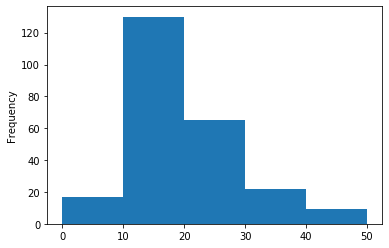

In [16]:
bins = np.arange(0,60,10)

tips['total_bill'].plot.hist(bins = bins)
plt.show()

Pandas built-in barplot:

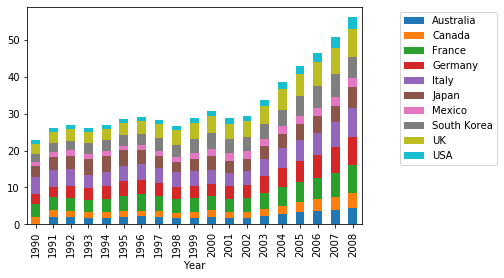

In [19]:
gas_prices.set_index('Year').plot.bar(stacked = True)
plt.legend(bbox_to_anchor = [1.1, 1])
plt.show()

Pandas built-in line plot:

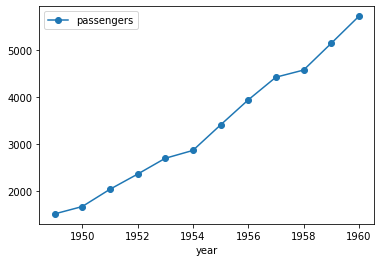

In [20]:
flights_grouped.plot.line(
    x = 'year',
    y = 'passengers',
    marker = 'o'
)

plt.show()

Pandas built-in basic scatter plot:

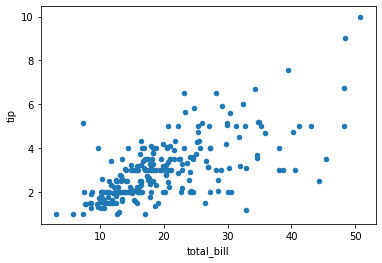

In [21]:
tips.plot.scatter(
    x = 'total_bill',
    y = 'tip'
)

plt.show()

Using column for color and size of the markers in Pandas built-in scatter plot:

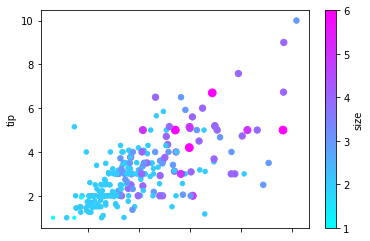

In [22]:
tips.plot.scatter(
    x = 'total_bill',
    y = 'tip',
    c = 'size',
    cmap = 'cool',
    s = tips['size'] * 10
)

plt.show()

Pandas built-in box plot:

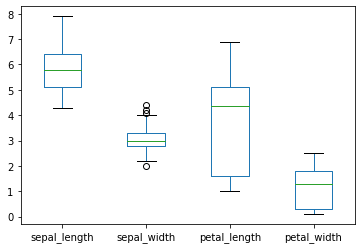

In [23]:
iris.plot.box()

plt.show()

Pandas built-in hexbin:

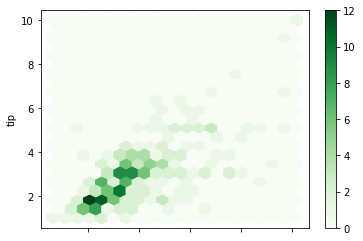

In [24]:
tips[['total_bill', 'tip']].plot.hexbin(
    x = 'total_bill',
    y = 'tip',
    gridsize = 20,
    cmap = 'Greens'
)

plt.show()

Pandas built-in kde:

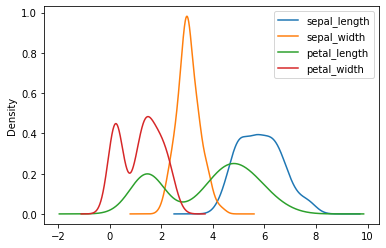

In [25]:
iris.plot.kde()

plt.show()